In [46]:
__author__ = 'Alysa Obertas'
__email__ = 'obertas@astro.utoronto.ca'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import corner
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [47]:
plt.rc('lines', linewidth=6)
plt.rc('font', size=40, family='serif', weight=500)
plt.rc('mathtext', fontset = 'dejavuserif')
plt.rc('axes', linewidth=6)
plt.rc('patch', linewidth=6)
plt.rc('xtick.major', width=5, size=20)
plt.rc('xtick.minor', width=4, size=15)
plt.rc('ytick.major', width=5, size=20)
plt.rc('ytick.minor', width=4, size=15)
plt.rc('figure.subplot', hspace=0.3)

In [48]:
#######################################################################
## read initial condition file

infile = "../generate-and-run-systems/initial_conditions_second_run_feb_11.npz"

ic = np.load(infile)

P_1 = ic['P_1'] # period of inner planet (REBOUND time)
P_2 = ic['P_2'] # period of outer planet (REBOUND time)

P_test_min = ic['P_test_min'] # minimum period of test particle (REBOUND time)
P_test_max = ic['P_test_max'] # maximum period of test particle (REBOUND time)
P_test_rand = ic['P_test_rand'] # periods for Nsims test particles (REBOUND time)

e_1_min = ic['e_1_min'] # lower bound for inner planet eccentricity
e_1_max = ic['e_1_max'] # upper bound for inner planet eccentricity
e_1_rand = ic['e_1_rand'] # inner planet eccentricities

e_2_min = ic['e_2_min'] # lower bound for outer planet eccentricity
e_2_max = ic['e_2_max'] # upper bound for outer planet eccentricity
e_2_rand = ic['e_2_rand'] # outer planet eccentricities

inc_1_min = ic['inc_1_min'] * 180 / np.pi # lower bound for inner planet inclination (degrees)
inc_1_max = ic['inc_1_max'] * 180 / np.pi # upper bound for inner planet inclination (degrees)
inc_1_rand = ic['inc_1_rand'] * 180 / np.pi # inner planet inclinations (degrees)

inc_2_min = ic['inc_2_min'] * 180 / np.pi # lower bound for outer planet inclination (degrees)
inc_2_max = ic['inc_2_max'] * 180 / np.pi # upper bound for outer planet inclination (degrees)
inc_2_rand = ic['inc_2_rand'] * 180 / np.pi # outer planet inclinations (degrees)

pomega_1_min = ic['pomega_1_min'] * 180 / np.pi # lower bound for inner planet longitude of periapsis (degrees)
pomega_1_max = ic['pomega_1_max'] * 180 / np.pi # upper bound for inner planet longitude of periapsis (degrees)
pomega_1_rand = ic['pomega_1_rand'] * 180 / np.pi # inner planet longitudes of periapsis (degrees)

pomega_2_min = ic['pomega_2_min'] * 180 / np.pi # lower bound for outer planet longitude of periapsis (degrees)
pomega_2_max = ic['pomega_2_max'] * 180 / np.pi # upper bound for outer planet longitude of periapsis (degrees)
pomega_2_rand = ic['pomega_2_rand'] * 180 / np.pi # outer planet longitudes of periapsis (degrees)

In [49]:
#######################################################################
## read spock probabilities file

outfile = "../spock-stability/probs-all-second-run-feb-11.npz"

spock_probs = np.load(outfile)

probs = spock_probs['probs']

Text(0,0.5,'Counts')

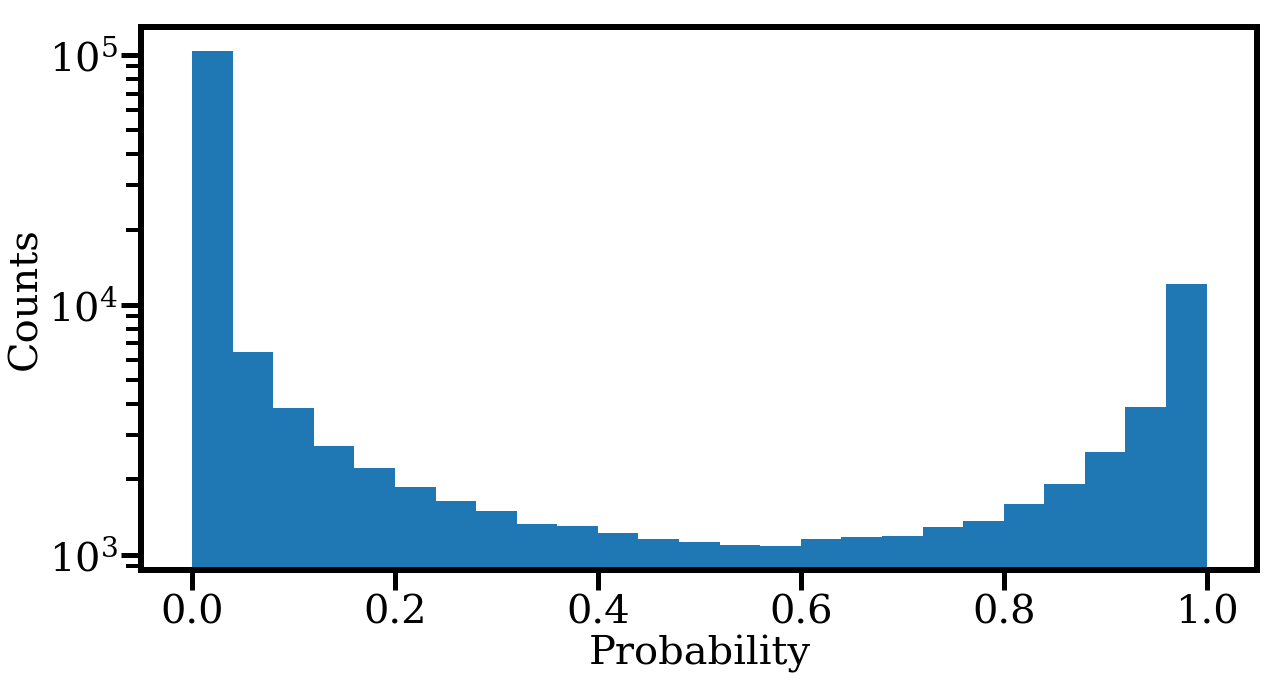

In [50]:
#######################################################################
## probability histogram

fig, ax = plt.subplots(1, 1, figsize=(20,10))

h = ax.hist(probs, bins=25);
ax.set_yscale('log')

ax.set_xlabel('Probability')
ax.set_ylabel('Counts')

In [6]:
#######################################################################
## define functions for making grids for imshow

def get_edges_and_centres(min_val, max_val, N_bins=25):
    edges = np.linspace(min_val, max_val, N_bins+1)
    centres = (edges[1:] + edges[0:-1])/2
    return edges, centres

def get_summary_stats(x_vals, y_vals, z_vals, x_min, x_max, y_min, y_max, N_bins=25, q=0.95):
    x_edges, x_centres = get_edges_and_centres(x_min, x_max, N_bins)
    y_edges, y_centres = get_edges_and_centres(y_min, y_max, N_bins)
    
    x_grid, y_grid = np.meshgrid(x_centres, y_centres, indexing='ij')
    
    mean_grid = np.zeros((N_bins, N_bins))
    median_grid = np.zeros((N_bins, N_bins))
    quant_grid = np.zeros((N_bins, N_bins))
    std_grid = np.zeros((N_bins, N_bins))
    
    for i in range(N_bins):
        x_index = np.logical_and(x_vals >= x_edges[i], x_vals < x_edges[i+1])
        for j in range(N_bins):
            y_index = np.logical_and(y_vals >= y_edges[j], y_vals < y_edges[j+1])
            joint_index = np.logical_and(x_index, y_index)
            
            mean_grid[i,j] = np.mean(z_vals[joint_index])
            median_grid[i,j] = np.median(z_vals[joint_index])
            quant_grid[i,j] = np.quantile(z_vals[joint_index], q)
            std_grid[i,j] = np.std(z_vals[joint_index])
          
    return (x_grid, y_grid, mean_grid, median_grid, quant_grid, std_grid)

def get_ims(x_vals, y_vals, z_vals, x_min, x_max, y_min, y_max, N_bins=25, q=0.95):
    fig, ax = plt.subplots(3, 4, figsize=(40,30), sharey='row')
    
    im_viridis = []
    im_magma = []
    
    row_1_data = get_summary_stats(x_vals[0], y_vals[0], z_vals, x_min[0], x_max[0], y_min[0], y_max[0], N_bins, q)
    im_viridis.append(ax[0][0].pcolormesh(row_1_data[0], row_1_data[1], row_1_data[2], cmap='viridis'))
    im_viridis.append(ax[0][1].pcolormesh(row_1_data[0], row_1_data[1], row_1_data[3], cmap='viridis'))
    im_viridis.append(ax[0][2].pcolormesh(row_1_data[0], row_1_data[1], row_1_data[4], cmap='viridis'))
    im_magma.append(ax[0][3].pcolormesh(row_1_data[0], row_1_data[1], row_1_data[5], cmap='magma'))

    row_2_data = get_summary_stats(x_vals[1], y_vals[1], z_vals, x_min[1], x_max[1], y_min[1], y_max[1], N_bins, q)
    im_viridis.append(ax[1][0].pcolormesh(row_2_data[0], row_2_data[1], row_2_data[2], cmap='viridis'))
    im_viridis.append(ax[1][1].pcolormesh(row_2_data[0], row_2_data[1], row_2_data[3], cmap='viridis'))
    im_viridis.append(ax[1][2].pcolormesh(row_2_data[0], row_2_data[1], row_2_data[4], cmap='viridis'))
    im_magma.append(ax[1][3].pcolormesh(row_2_data[0], row_2_data[1], row_2_data[5], cmap='magma'))

    row_3_data = get_summary_stats(x_vals[2], y_vals[2], z_vals, x_min[2], x_max[2], y_min[2], y_max[2], N_bins, q)
    im_viridis.append(ax[2][0].pcolormesh(row_3_data[0], row_3_data[1], row_3_data[2], cmap='viridis'))
    im_viridis.append(ax[2][1].pcolormesh(row_3_data[0], row_3_data[1], row_3_data[3], cmap='viridis'))
    im_viridis.append(ax[2][2].pcolormesh(row_3_data[0], row_3_data[1], row_3_data[4], cmap='viridis'))
    im_magma.append(ax[2][3].pcolormesh(row_3_data[0], row_3_data[1], row_3_data[5], cmap='magma'))

    vmin_viridis = min(im.get_array().min() for im in im_viridis)
    vmax_viridis = max(im.get_array().max() for im in im_viridis)
    norm_viridis = matplotlib.colors.Normalize(vmin=vmin_viridis, vmax=vmax_viridis)
    for im in im_viridis:
        im.set_norm(norm_viridis)
    
    vmin_magma = min(im.get_array().min() for im in im_magma)
    vmax_magma = max(im.get_array().max() for im in im_magma)
    norm_magma = matplotlib.colors.Normalize(vmin=vmin_magma, vmax=vmax_magma)
    for im in im_magma:
        im.set_norm(norm_magma)
    
    ax_viridis = inset_axes(ax[1][0], width="100%", height="100%", loc='center left', bbox_to_anchor=(-1, 330, 90, 1500))
    fig.colorbar(im_viridis[0], cax=ax_viridis, orientation="vertical")#, ticks=[1, 2, 3])
    ax_viridis.yaxis.set_ticks_position("left")

    ax_magma = inset_axes(ax[1][2], width="100%", height="100%", loc='center right', bbox_to_anchor=(2700, 330, 90, 1500))
    fig.colorbar(im_magma[0], cax=ax_magma, orientation="vertical")
        
    ax[0][0].set_title('Mean')
    ax[0][1].set_title('Median')
    ax[0][2].set_title('%d%%  Quantile' % (100*q))
    ax[0][3].set_title('Standard Deviation')
        
    return fig, ax, im_viridis, im_magma, (row_1_data, row_2_data, row_3_data)

Text(0,0.5,'$e_2$')

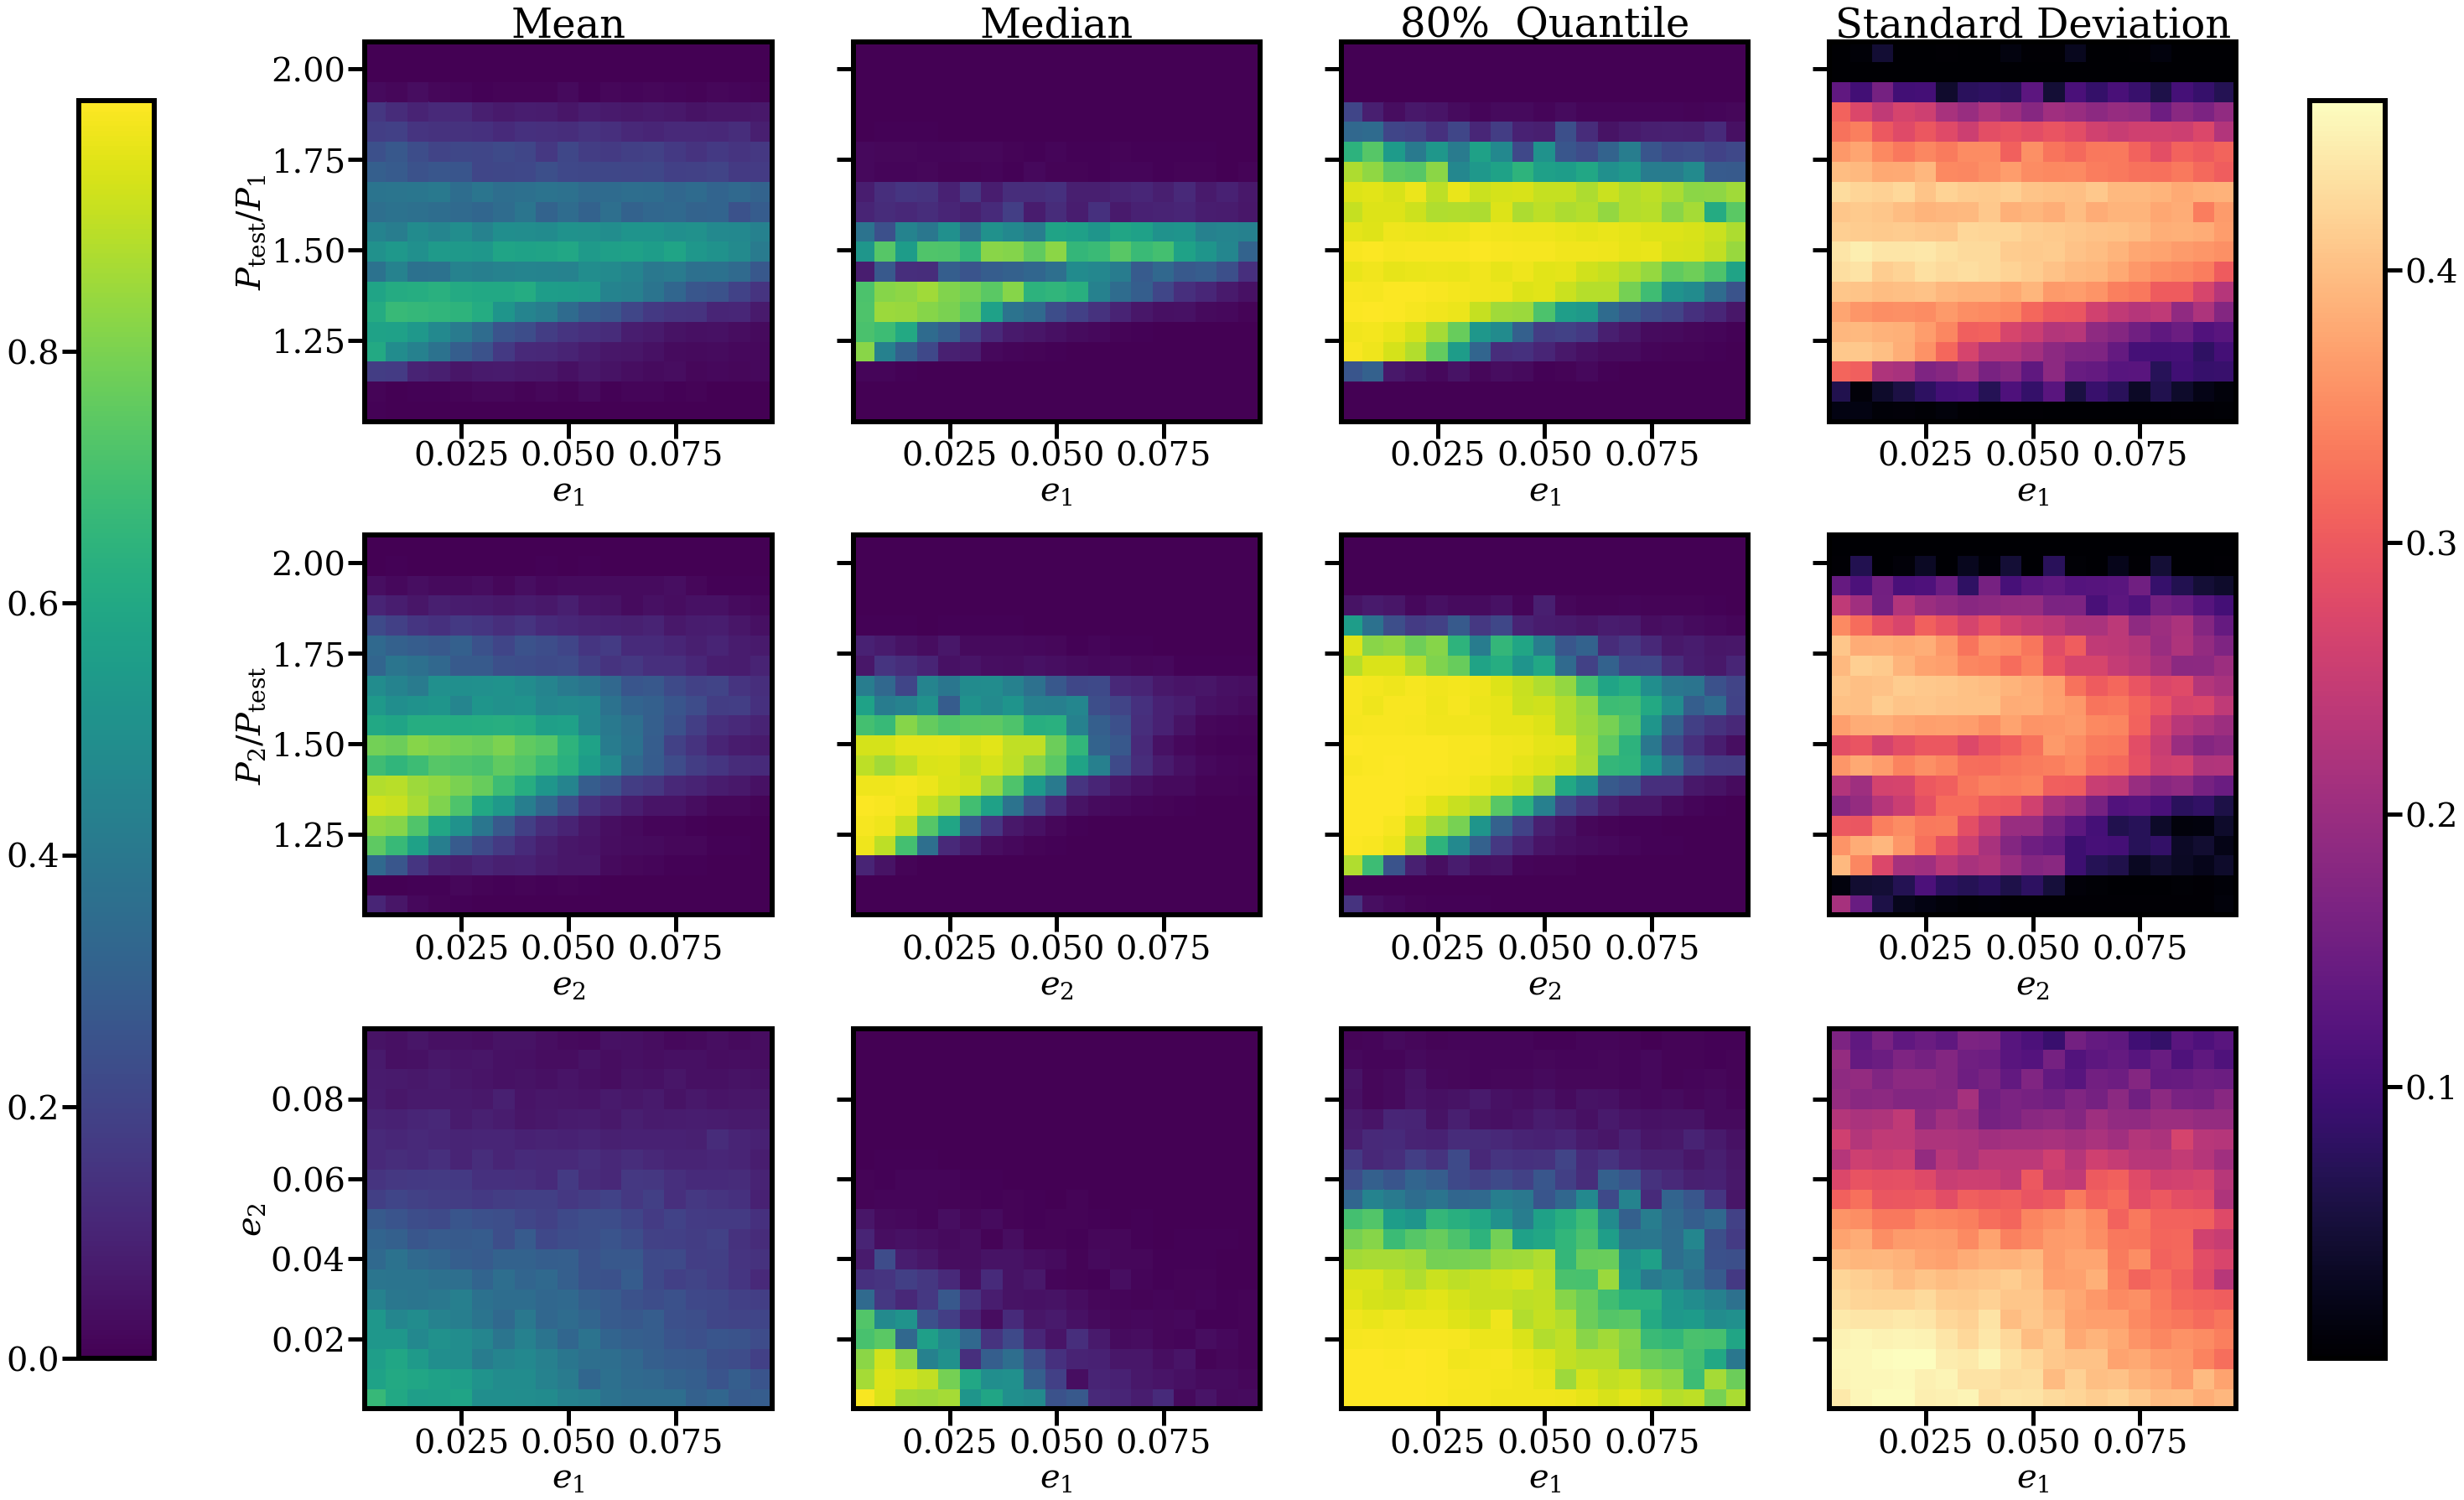

In [7]:
#######################################################################
## plot summary stats for eccentricities, periods

x_vals = (e_1_rand, e_2_rand, e_1_rand)
x_min = (e_1_min, e_2_min, e_1_min)
x_max = (e_1_max, e_2_max, e_1_max)

y_vals = (P_test_rand / P_1, P_2 / P_test_rand, e_2_rand)
y_min = (P_test_min / P_1, P_2 / P_test_max, e_2_min)
y_max = (P_test_max / P_1, P_2 / P_test_min, e_2_max)

N_bins = 20
q = 0.8

fig, ax, im_viridis, im_magma, row_data = get_ims(x_vals, y_vals, probs, x_min, x_max, y_min, y_max, N_bins=N_bins, q=q)

for sub_ax in ax[0]:
    sub_ax.set_xlabel('$e_1$')
ax[0][0].set_ylabel('$P_{\mathrm{test}}/P_1}$')

for sub_ax in ax[1]:
    sub_ax.set_xlabel('$e_2$')
ax[1][0].set_ylabel('$P_2/P_{\mathrm{test}}$')

for sub_ax in ax[2]:
    sub_ax.set_xlabel('$e_1$')
ax[2][0].set_ylabel('$e_2$')

# plt.savefig('probability-summary-eccentricities-periods.pdf', bbox_inches='tight')
# plt.savefig('probability-summary-eccentricities-periods.png', bbox_inches='tight')

Text(0,0.5,'$i_2$')

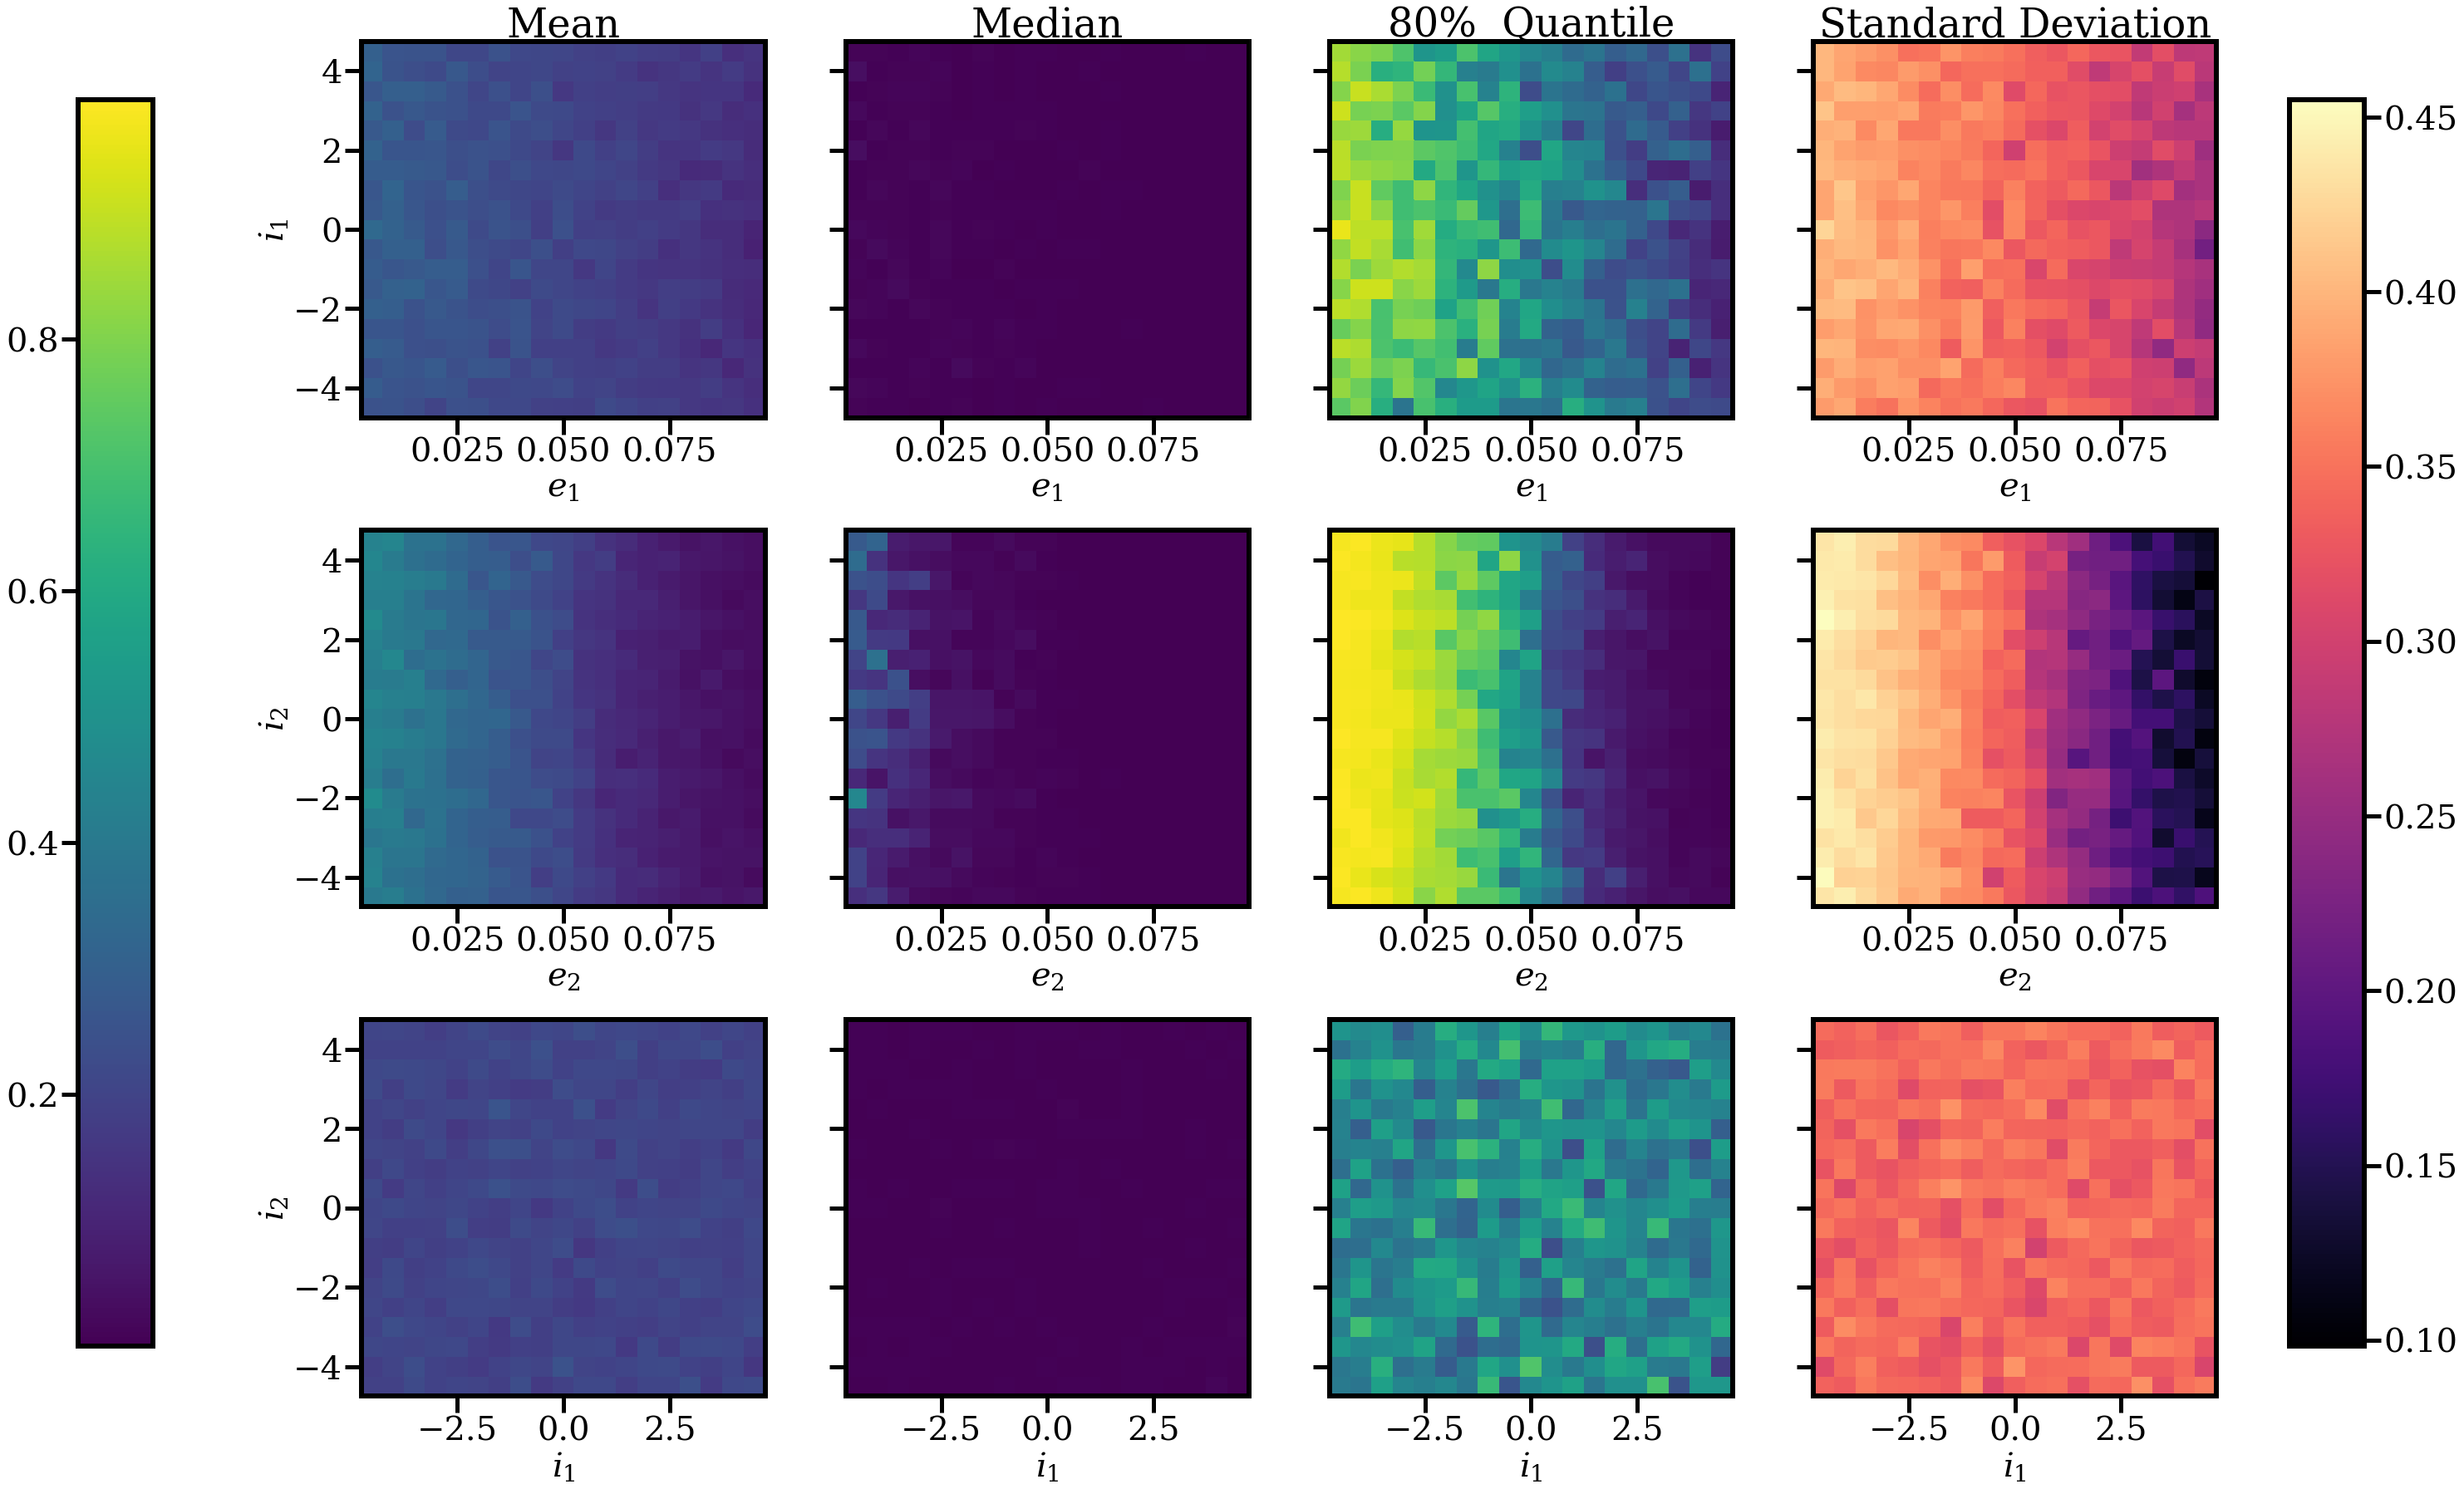

In [8]:
#######################################################################
## plot summary stats for eccentricities, inclinations

x_vals = (e_1_rand, e_2_rand, inc_1_rand)
x_min = (e_1_min, e_2_min, inc_1_min)
x_max = (e_1_max, e_2_max, inc_1_max)

y_vals = (inc_1_rand, inc_2_rand, inc_2_rand)
y_min = (inc_1_min, inc_2_min, inc_2_min)
y_max = (inc_1_max, inc_2_max, inc_2_max)

N_bins = 20
q = 0.8

fig, ax, im_viridis, im_magma, row_data = get_ims(x_vals, y_vals, probs, x_min, x_max, y_min, y_max, N_bins=N_bins, q=q)

for sub_ax in ax[0]:
    sub_ax.set_xlabel('$e_1$')
ax[0][0].set_ylabel('$i_1$')

for sub_ax in ax[1]:
    sub_ax.set_xlabel('$e_2$')
ax[1][0].set_ylabel('$i_2$')

for sub_ax in ax[2]:
    sub_ax.set_xlabel('$i_1$')
ax[2][0].set_ylabel('$i_2$')

# plt.savefig('probability-summary-eccentricities-inclinations.pdf', bbox_inches='tight')
# plt.savefig('probability-summary-eccentricities-inclinations.png', bbox_inches='tight')

Text(0,0.5,'$\\varpi_2$')

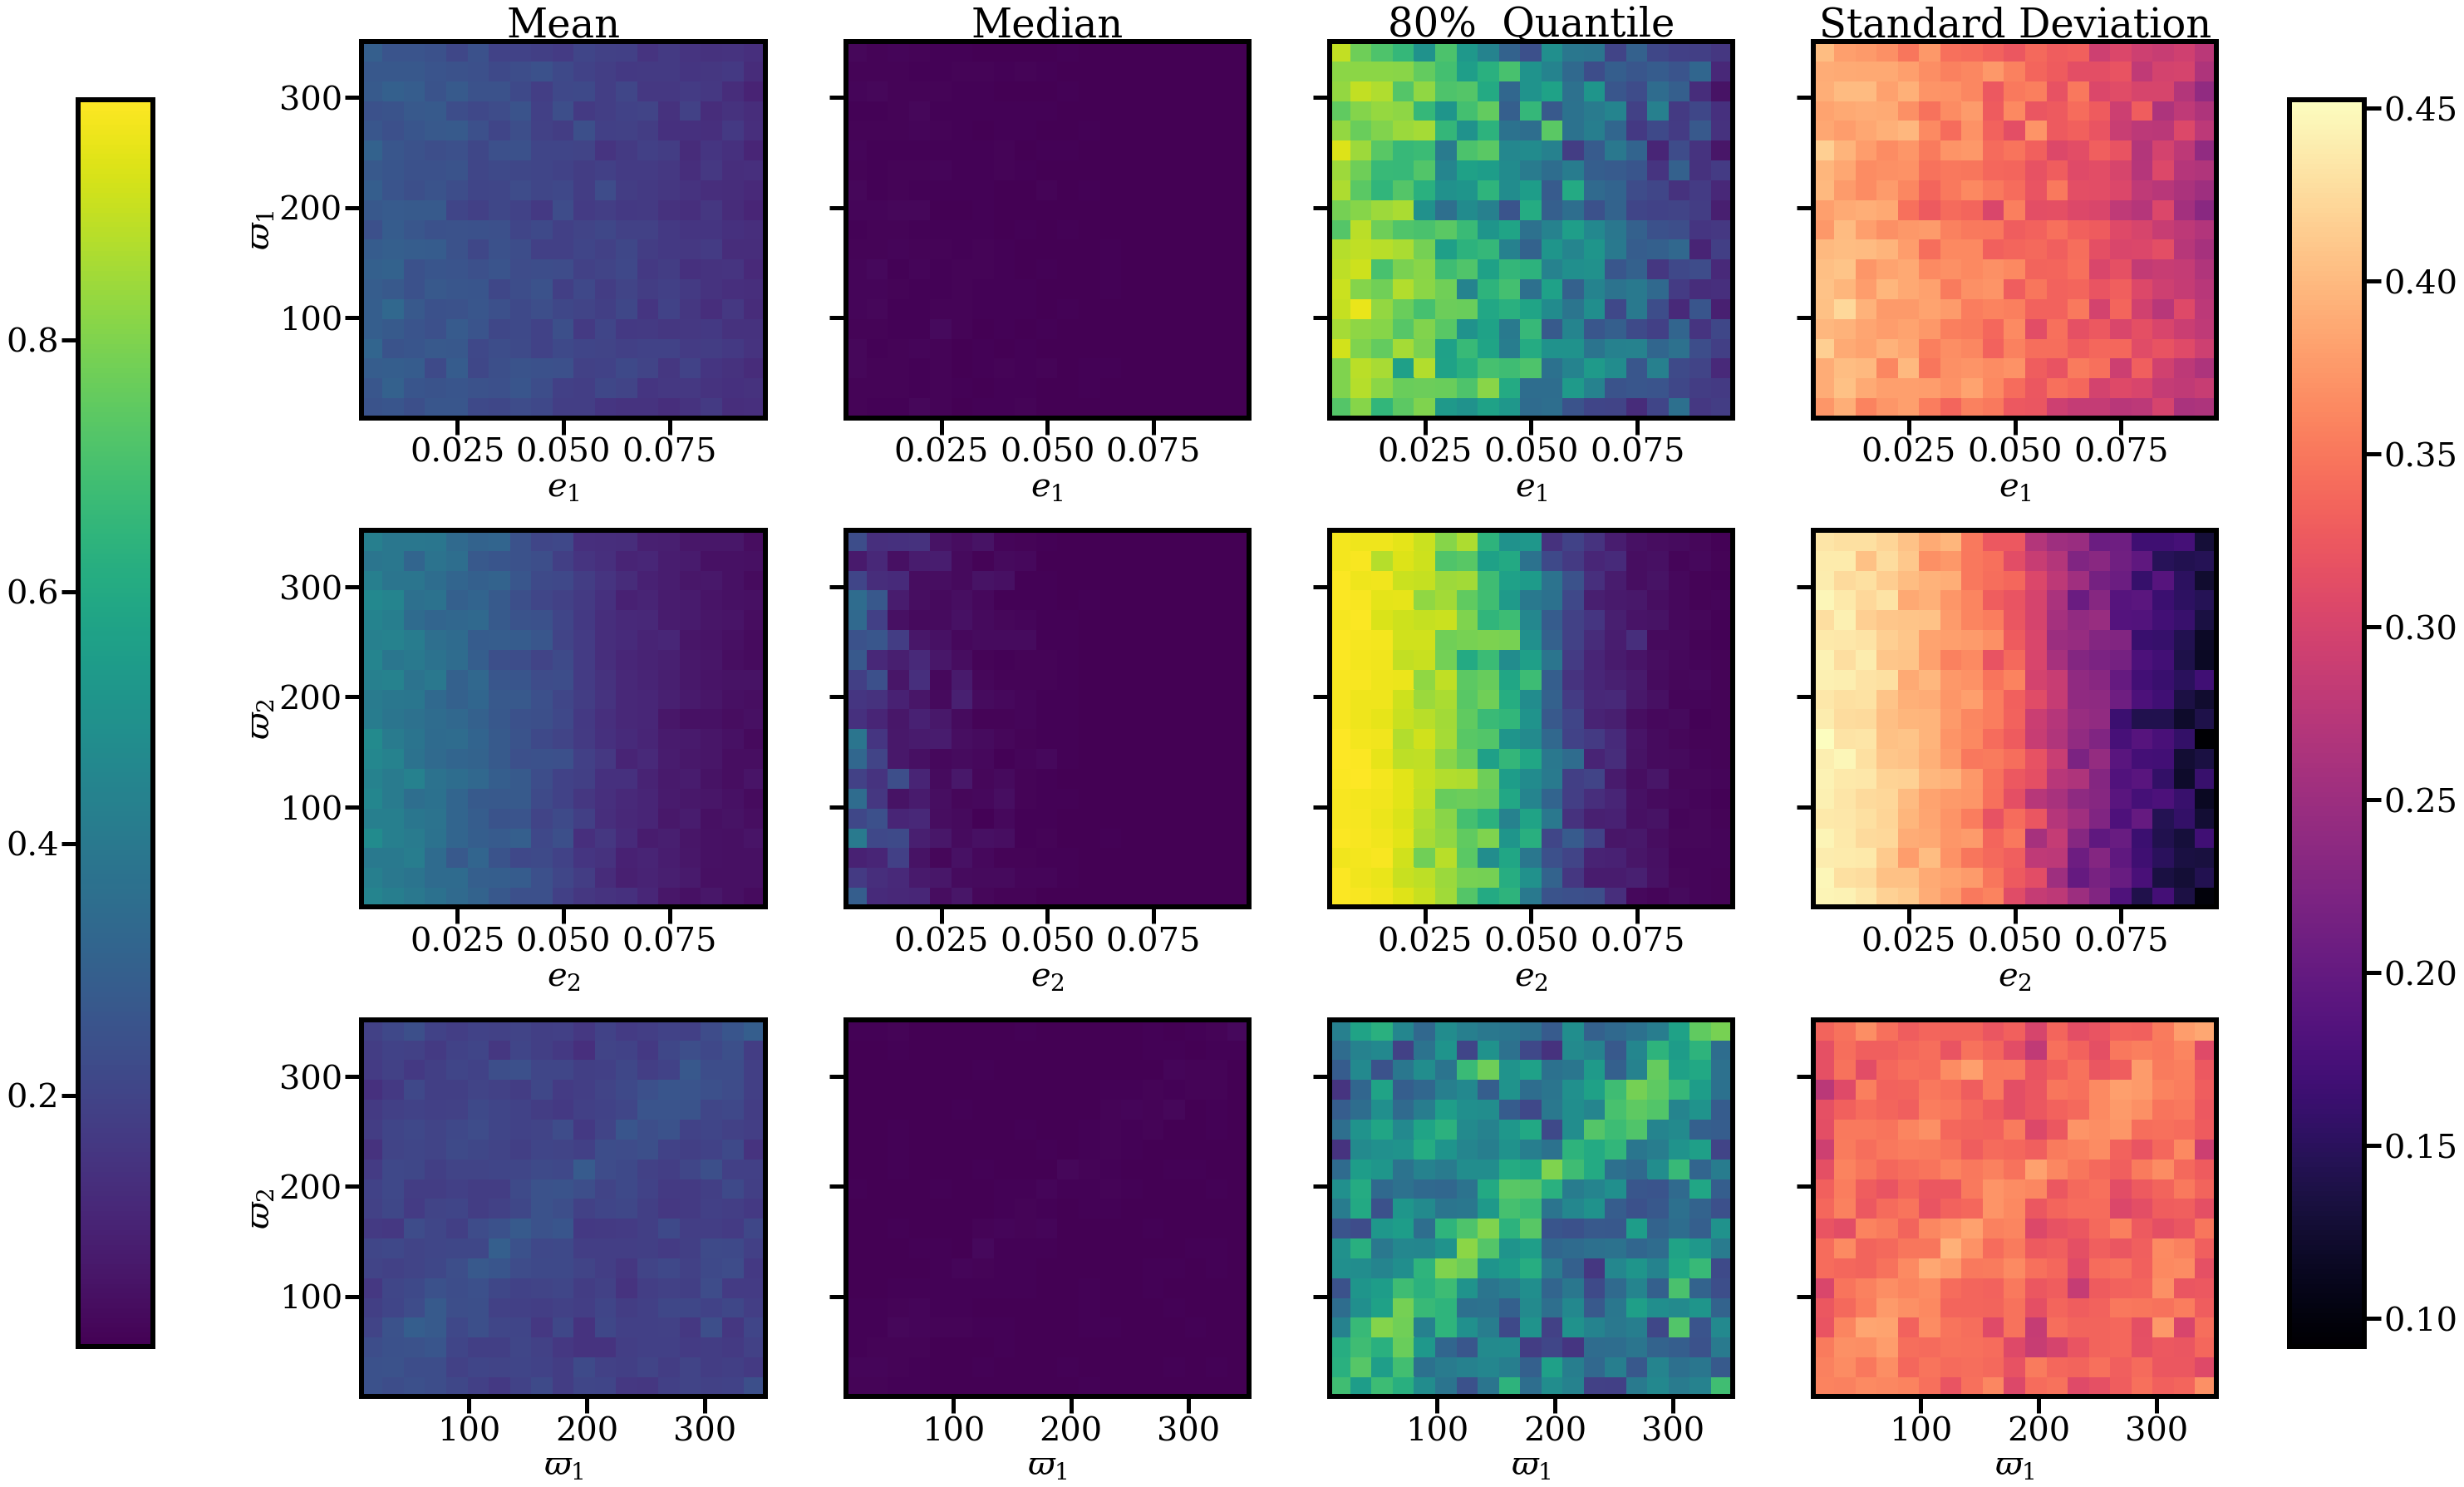

In [9]:
#######################################################################
## plot summary stats for eccentricities, pomegas

x_vals = (e_1_rand, e_2_rand, pomega_1_rand)
x_min = (e_1_min, e_2_min, pomega_1_min)
x_max = (e_1_max, e_2_max, pomega_1_max)

y_vals = (pomega_1_rand, pomega_2_rand, pomega_2_rand)
y_min = (pomega_1_min, pomega_2_min, pomega_2_min)
y_max = (pomega_1_max, pomega_2_max, pomega_2_max)

N_bins = 20
q = 0.8

fig, ax, im_viridis, im_magma, row_data = get_ims(x_vals, y_vals, probs, x_min, x_max, y_min, y_max, N_bins=N_bins, q=q)

for sub_ax in ax[0]:
    sub_ax.set_xlabel('$e_1$')
ax[0][0].set_ylabel('$\\varpi_1$')

for sub_ax in ax[1]:
    sub_ax.set_xlabel('$e_2$')
ax[1][0].set_ylabel('$\\varpi_2$')

for sub_ax in ax[2]:
    sub_ax.set_xlabel('$\\varpi_1$')
ax[2][0].set_ylabel('$\\varpi_2$')

# plt.savefig('probability-summary-eccentricities-pomegas.pdf', bbox_inches='tight')
# plt.savefig('probability-summary-eccentricities-pomegas.png', bbox_inches='tight')